In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [6]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.5493170986842111, 0.7124626947054237],
 'diameter': 51.70831511216825,
 'confidence': 0.9842621684074402,
 'timestamp': 323688.890401,
 'sphere': {'center': [8.468568278948466,
   -3.367388456156882,
   41.56436370255615],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [153.5336678706746, 72.98040154813086],
  'axes': [168.74855360480083, 168.74855360480083],
  'angle': 0.0},
 'circle_3d': {'center': [1.5334798949610278,
   -4.706156832827486,
   33.94122469425325],
  'normal': [-0.667329190891499, -0.1288230471088886, -0.7335368930856023],
  'radius': 2.7224131586036893},
 'diameter_3d': 5.4448263172073785,
 'ellipse': {'center': [105.46888294736853, 55.207162616558655],
  'axes': [40.20953342979794, 51.70831511216825],
  'angle': 19.552883850413295},
 'location': [105.46888294736853, 55.207162616558655],
 'model_confidence': 1.0,
 'theta': 1.699978372574807,
 'phi': -2.308967654605

Text(0.5, 0, 'Pupil timestamp (s)')

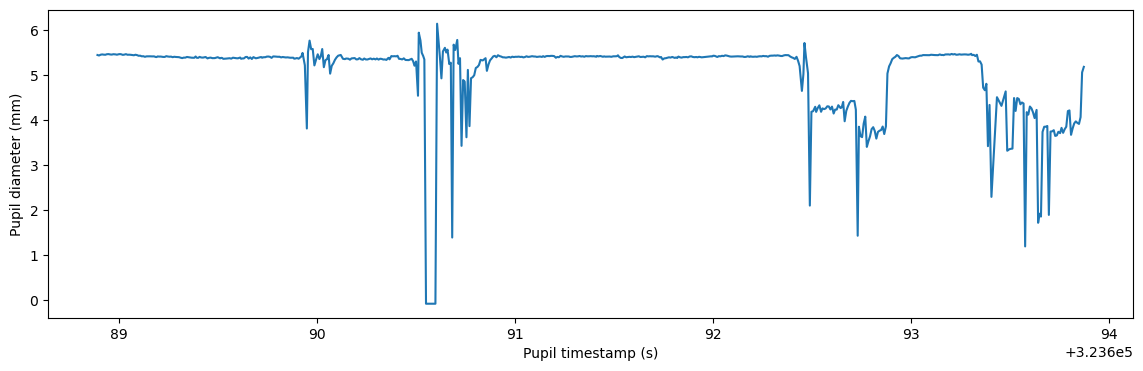

In [7]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')